In [1]:
import numpy as nd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("admission_predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.drop('Serial No.', inplace=True, axis = 1)

In [7]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
# sns.pairplot(df)
# plt.show()

In [9]:
x=df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y=df['Chance of Admit ']

In [10]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=13)

In [11]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
205,295,99,2,2.5,3.0,7.65,0
12,328,112,4,4.0,4.5,9.10,1
475,300,101,3,3.5,2.5,7.88,0
101,312,105,2,2.5,3.0,8.12,0
118,296,99,2,3.0,3.5,7.28,0
...,...,...,...,...,...,...,...
230,313,104,3,4.0,4.5,8.65,0
16,317,107,3,4.0,3.0,8.70,0
74,314,106,3,3.0,5.0,8.90,0
176,329,119,4,4.5,4.5,9.16,1


In [12]:
y_train

205    0.57
12     0.78
475    0.59
101    0.64
118    0.47
       ... 
230    0.73
16     0.66
74     0.74
176    0.90
338    0.81
Name: Chance of Admit , Length: 400, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: -1.2102423812611676
Coefficients: [0.00156636 0.0030485  0.00488305 0.00205058 0.01953831 0.11676944
 0.03183657]


In [14]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
334,312,107,4,4.5,4.0,8.65,1
33,340,114,5,4.0,4.0,9.60,1
264,325,110,2,3.0,2.5,8.76,1
428,316,103,2,2.0,4.5,8.74,0
...,...,...,...,...,...,...,...
78,296,95,2,3.0,2.0,7.54,1
44,326,113,5,4.5,4.0,9.40,1
98,332,119,4,5.0,4.5,9.24,1
51,312,100,2,1.5,3.5,7.90,1


In [15]:
ypred_test=model.predict(x_test)

In [16]:
print("Test R2:",model.score(x_test,y_test))

Test R2: 0.8515607944969581


In [17]:
train_predictions=model.predict(x_train)
print("Train R2:",model.score(x_train,y_train))

Train R2: 0.8131331169403269


In [18]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(model,x,y,cv=5).mean())

Cross Validation Score: 0.8108015220863886


In [19]:
test_res=y_test-ypred_test

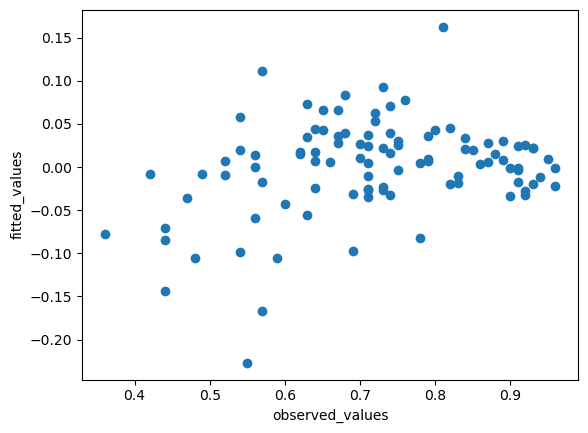

In [20]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

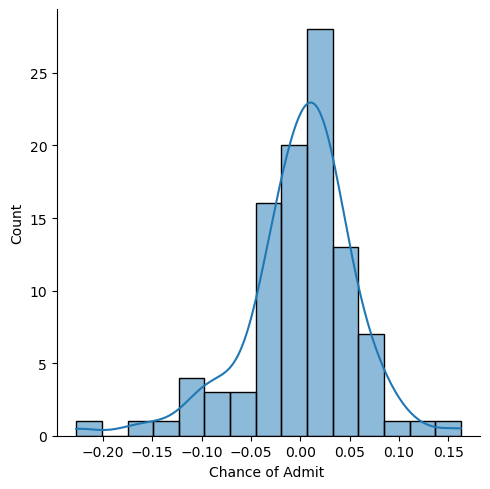

In [21]:
sns.displot(test_res,bins=15,kde=True)
plt.show()

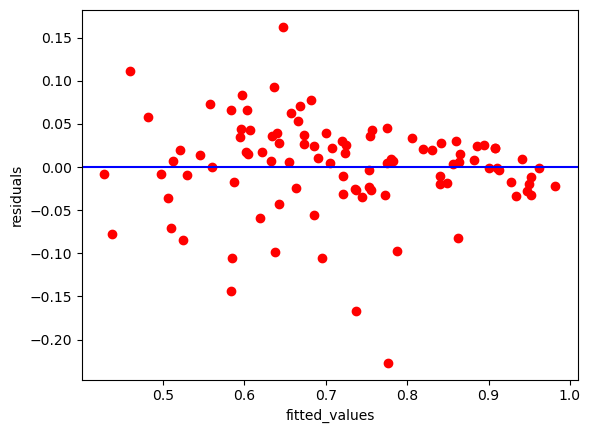

In [22]:
plt.scatter(ypred_test,test_res,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [23]:
# prediction on new data(MLR)

In [34]:
input_data={'GRE Score':359,'TOEFL Score':111,'University Rating':4,'SOP':4.8,'LOR ':3.6,'CGPA':8.24,'Research':1}

In [35]:
df_test=pd.DataFrame(input_data,index=[0])

In [36]:
transformed_data=df_test.drop(df_test.columns[[]],axis=1)

In [37]:
# predict

In [38]:
model.predict(transformed_data)

array([0.78419453])